In [2]:
import pandas as pd

funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep = ';', decimal = ',', encoding = 'utf-8')
clientes_df = pd.read_csv(r'CadastroClientes.csv', sep = ';', encoding='utf-8')
servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')

#Retirando as colunas de "Estado Civil" e "Cargo" da tabela df_fincionarios
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis = 1)

funcionarios_df

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


In [6]:
clientes_df


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


In [7]:
servicos_df

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


# 1 - Folha Salarial


In [66]:
funcionarios_df['Salário Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print(f"Temos um total de {funcionarios_df['ID Funcionário'].count()} funcionários.")
print(f"Total da Folha Salarial Mensal é de R${funcionarios_df['Salário Total'].sum():,}")

Temos um total de 114 funcionários.
Total da Folha Salarial Mensal é de R$2,717,493.22


## 2 - Faturamento da Empresa

In [9]:
# Adicionando a tabela caracteristicas(clientes_df) à tabela fatos(servicos_df)
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']])
faturamentos_df['Faturamento da Empresa'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']

print(f"O faturamento total da empresa foi de R${faturamentos_df['Faturamento da Empresa'].sum():,}")

O faturamento total da empresa foi de R$5,519,160


## 3 - % Funcionários que Fecharam Contrato

In [74]:
qtde_func_contrato_fechado = len(servicos_df['ID Funcionário'].unique())
qtde_func_total = len(funcionarios_df['ID Funcionário'])

print(f'{qtde_func_contrato_fechado / qtde_func_total:.2%} dos funcionários fecharam contrato')


86.84% dos funcionários fecharam contrato


## 4- Qtde Contratos por Área

In [10]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()

contratos_area_qtde



Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

##  5 - Funcionários por Área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot:>

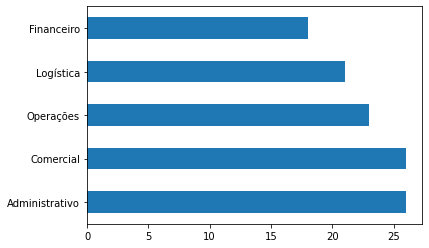

In [11]:
funcionarios_area = funcionarios_df['Area'].value_counts()
print(funcionarios_area)
funcionarios_area.plot(kind='barh')


## 6 - Ticket Médio Mensal

In [3]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print(f'Ticket Médio Mensal: R${ticket_medio:,.2f}')

Ticket Médio Mensal: R$2,502.56


## 7 - Corrigindo Salário de funcionário

In [20]:
correcao_funcionarios_df = funcionarios_df.set_index('Nome Completo')
correcao_funcionarios_df.loc["Gabriel Mesquita",'Salario Base'] = 30000

correcao_funcionarios_df

,ID Funcionário,Salario Base,Impostos,Beneficios,VT,VR,Area
Nome Completo,,,,,,,
Gabriel Mesquita,1,30000,10955.0,4382.0,242,719.04,Operações
João Haddad,2,5404,2702.0,1080.8,154,574.56,Logística
Amanda Marques Ribeiro,3,16066,8033.0,3213.2,154,729.12,Administrativo
Guilherme Nunez,4,21305,10652.5,4261.0,220,524.16,Administrativo
Adelino Gomes,5,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...
Renan Scharnhorst Ott,143,10793,5396.5,2158.6,242,514.08,Logística
Lucas Brum Pereira,144,4048,2024.0,809.6,198,796.32,Comercial
Caio Stellet,148,24596,12298.0,4919.2,242,561.12,Administrativo


## 8 - Separando a quantidade de funcionários por setor e definindo-os


In [25]:
areas_totais = funcionarios_df['Area'].value_counts()
funcionarios_administrativo = funcionarios_df[funcionarios_df['Area'] == 'Administrativo']
funcionarios_comercial = funcionarios_df[funcionarios_df['Area'] == 'Comercial']
funcionarios_operacoes = funcionarios_df[funcionarios_df['Area'] == 'Operações']
funcionarios_logistica = funcionarios_df[funcionarios_df['Area'] == 'Logística']
funcionarios_financeiro = funcionarios_df[funcionarios_df['Area'] == 'Financeiro']

display(areas_totais)
display(funcionarios_administrativo)
display(funcionarios_comercial)
display(funcionarios_operacoes)
display(funcionarios_logistica)
display(funcionarios_financeiro)

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
9,10,Andre Campos,24857,12428.5,4971.4,264,719.04,Administrativo
10,11,André Melo Soledade,9955,4977.5,1991.0,198,719.04,Administrativo
18,23,Bárbara Spenchutt Vieira,9402,4701.0,1880.4,154,742.56,Administrativo
20,25,Livia Mello,23612,11806.0,4722.4,264,561.12,Administrativo
26,32,Marina Silva Pacheco,24271,12135.5,4854.2,308,631.68,Administrativo
28,35,Carolina Gaspar de Mattos,10078,5039.0,2015.6,198,561.12,Administrativo
35,46,Rafael Rozental,20030,10015.0,4006.0,308,628.32,Administrativo


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
15,18,Isabella Bernardo,8460,4230.0,1692.0,308,574.56,Comercial
17,22,Bruno Vargas,10726,5363.0,2145.2,198,547.68,Comercial
21,26,Jéssica Neves Heimlich,16364,8182.0,3272.8,154,638.40,Comercial
23,28,Luís Werneck,7601,3800.5,1520.2,198,816.48,Comercial
29,36,Victor Mota,19456,9728.0,3891.2,286,799.68,Comercial
32,39,Tomas Guadagnino,14468,7234.0,2893.6,308,745.92,Comercial
34,45,Mariana Martins,3374,1687.0,674.8,286,520.80,Comercial
42,56,Isabelle Tiradentes,19297,9648.5,3859.4,154,557.76,Comercial
47,62,Luiz Guarçoni Migueis,19843,9921.5,3968.6,154,540.96,Comercial
50,65,João Ramos,11596,5798.0,2319.2,198,504.00,Comercial


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
5,6,Audir de Avila Goulart,23688,11844.0,4737.6,242,594.72,Operações
7,8,Gil Bonder,3540,1770.0,708.0,198,769.44,Operações
19,24,Andre Ramos,13024,6512.0,2604.8,286,789.60,Operações
24,29,Cícero Barcelos Tagliari,11283,5641.5,2256.6,176,638.40,Operações
27,34,Vitor Cordovil de Maglhães,13652,6826.0,2730.4,220,598.08,Operações
31,38,Marcelo Amaral Coelho,17475,8737.5,3495.0,176,809.76,Operações
33,44,Matheus Pereira dos Santos,17930,8965.0,3586.0,308,735.84,Operações
36,47,Rodrigo e Silva Lemos,7480,3740.0,1496.0,264,779.52,Operações
43,57,Raissa Carelli,24482,12241.0,4896.4,220,661.92,Operações


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
11,13,Luca Costa,22980,11490.0,4596.0,176,658.56,Logística
14,17,Pedro Carrera,15718,7859.0,3143.6,176,628.32,Logística
25,31,Thayná Freitas Medronho,9562,4781.0,1912.4,264,604.80,Logística
40,52,Jéssica de Morais Silva,20951,10475.5,4190.2,308,776.16,Logística
44,58,Lorena Marinho,7049,3524.5,1409.8,286,759.36,Logística
45,60,Fillipe Tupini,19379,9689.5,3875.8,286,792.96,Logística
46,61,Michelle Zerbinato,13008,6504.0,2601.6,308,517.44,Logística
51,66,Poline Limp,19441,9720.5,3888.2,242,819.84,Logística
57,72,Lucas Duarte,11867,5933.5,2373.4,264,524.16,Logística


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
6,7,Zilma Guimarães,17875,8937.5,3575.0,286,813.12,Financeiro
8,9,Gustavo de Melo Teixeira,23512,11756.0,4702.4,242,745.92,Financeiro
12,14,Jessica Oliveira Lima,2182,1091.0,436.4,220,604.80,Financeiro
13,16,Vinicius Freitas,2411,1205.5,482.2,264,792.96,Financeiro
16,21,Maria Lobo,19045,9522.5,3809.0,264,836.64,Financeiro
22,27,Carolina Monteiro,1865,932.5,373.0,198,635.04,Financeiro
30,37,Marcos Almeida Albuquerque Faria,3398,1699.0,679.6,242,540.96,Financeiro
37,48,Marianna Pereira da Silva,3947,1973.5,789.4,176,829.92,Financeiro
38,49,Roberto Suzano,24509,12254.5,4901.8,154,507.36,Financeiro
52,67,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Financeiro
